In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime

# Create output directories
for folder in ['results/visualizations', 'results/outputs', 'results/logs']:
    os.makedirs(folder, exist_ok=True)

In [2]:
# Load diabetes dataset
print("📂 LOADING DATASET")
print("-" * 20)

try:
    # Load your diabetes.csv file
    df = pd.read_csv( 'data/raw/diabetes.csv' )
    
    # Quick preprocessing for categorical columns
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = df[col].astype(str).str.strip().str.lower().map({'yes': 1, 'no': 0})
    
    print(f"✅ Dataset loaded successfully")
    print(f"📊 Shape: {df.shape}")
    print(f"📋 Columns: {list(df.columns)}")
    
    # Show sample
    display(df.head())
    
except FileNotFoundError:
    print("❌ diabetes.csv not found in data/raw/")
    print("Please place your diabetes.csv file in the data/raw/ folder")


📂 LOADING DATASET
--------------------
✅ Dataset loaded successfully
📊 Shape: (70692, 22)
📋 Columns: ['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,0,1,26,0,0,0,1,0,...,1,0,3,5,30,0,NaN,4,6,8
1,0,1,1,1,26,1,1,0,0,1,...,1,0,3,0,0,0,NaN,12,6,8
2,0,0,0,1,26,0,0,0,1,1,...,1,0,1,0,10,0,NaN,13,6,8
3,0,1,1,1,28,1,0,0,1,1,...,1,0,3,0,3,0,NaN,11,6,8
4,0,0,0,1,29,1,0,0,1,1,...,1,0,2,0,0,0,NaN,8,5,8


🔍 BMI ANALYSIS
---------------
📈 BMI Statistics:
Count: 70,692
Mean: 29.86
Median: 29.00
Std: 7.11
Min: 12.00
Max: 98.00


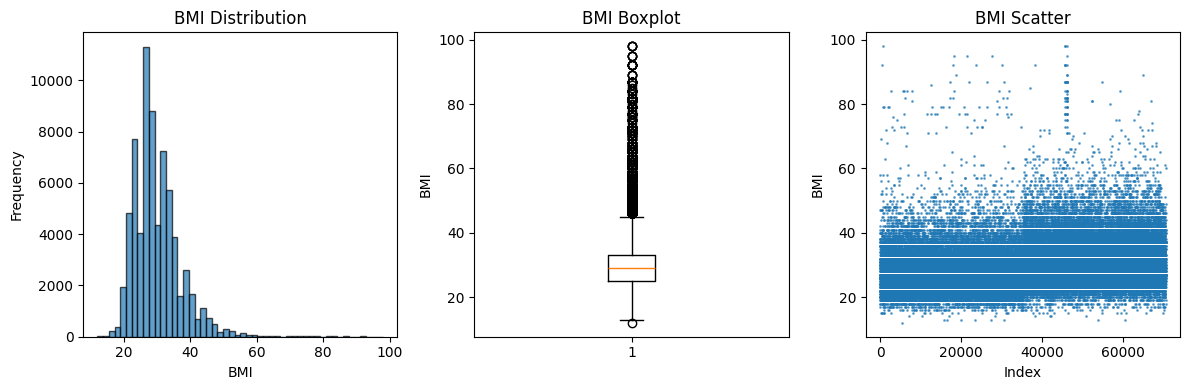

In [ ]:
# Focus on BMI for outlier analysis
print("🔍 BMI ANALYSIS")
print("-" * 15)

# Select BMI column
target_col = 'BMI'
bmi_data = df[target_col].dropna()

print(f"📈 BMI Statistics:")
print(f"Count: {len(bmi_data):,}")
print(f"Mean: {bmi_data.mean():.2f}")
print(f"Median: {bmi_data.median():.2f}")
print(f"Std: {bmi_data.std():.2f}")
print(f"Min: {bmi_data.min():.2f}")
print(f"Max: {bmi_data.max():.2f}")

# Quick visualization
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(bmi_data, bins=50, alpha=0.7, edgecolor='black')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.boxplot(bmi_data)
plt.title('BMI Boxplot')
plt.ylabel('BMI')

plt.subplot(1, 3, 3)
plt.scatter(range(len(bmi_data)), bmi_data, alpha=0.6, s=1)
plt.title('BMI Scatter')
plt.xlabel('Index')
plt.ylabel('BMI')

plt.tight_layout()
plt.show()


In [ ]:
# IQR METHOD - OUTLIER DETECTION
print("📊 IQR OUTLIER DETECTION")
print("=" * 25)

# Calculate IQR
Q1 = bmi_data.quantile(0.25)
Q3 = bmi_data.quantile(0.75)
IQR = Q3 - Q1

# Calculate boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"📈 IQR Statistics:")
print(f"Q1 (25th percentile): {Q1:.2f}")
print(f"Q3 (75th percentile): {Q3:.2f}")
print(f"IQR: {IQR:.2f}")
print(f"Lower boundary: {lower_bound:.2f}")
print(f"Upper boundary: {upper_bound:.2f}")

# Identify outliers
outlier_mask = (df[target_col] < lower_bound) | (df[target_col] > upper_bound)
outliers = df[outlier_mask]
clean_data = df[~outlier_mask]

print(f"\n🚨 Outlier Results:")
print(f"Total rows: {len(df):,}")
print(f"Outliers found: {len(outliers):,}")
print(f"Outlier percentage: {(len(outliers)/len(df)*100):.2f}%")
print(f"Clean data: {len(clean_data):,}")
print(f"Data retention: {(len(clean_data)/len(df)*100):.1f}%")


📊 IQR OUTLIER DETECTION
📈 IQR Statistics:
Q1 (25th percentile): 25.00
Q3 (75th percentile): 33.00
IQR: 8.00
Lower boundary: 13.00
Upper boundary: 45.00

🚨 Outlier Results:
Total rows: 70,692
Outliers found: 2,181
Outlier percentage: 3.09%
Clean data: 68,511
Data retention: 96.9%


In [5]:
# SAVE CLEAN DATASET AND REPORT
print("💾 SAVING RESULTS")
print("=" * 20)

# Save clean dataset
clean_data.to_csv('results/outputs/diabetes_clean.csv', index=False)
outliers.to_csv('results/outputs/outliers_removed.csv', index=False)

# Create simple report
report = {
    "project_info": {
        "student": "[Your Name]",
        "it_number": "[Your IT Number]",
        "method": "IQR Outlier Detection",
        "date": datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    },
    "results": {
        "original_rows": len(df),
        "outliers_detected": len(outliers),
        "outlier_percentage": round(len(outliers)/len(df)*100, 2),
        "clean_rows": len(clean_data),
        "data_retention": round(len(clean_data)/len(df)*100, 1)
    },
    "iqr_stats": {
        "Q1": float(Q1),
        "Q3": float(Q3),
        "IQR": float(IQR),
        "lower_bound": float(lower_bound),
        "upper_bound": float(upper_bound)
    },
    "statistics": {
        "original_mean": float(df[target_col].mean()),
        "cleaned_mean": float(clean_data[target_col].mean()),
        "original_std": float(df[target_col].std()),
        "cleaned_std": float(clean_data[target_col].std())
    }
}

# Save report as text (no JSON needed)
with open('results/logs/outlier_report.txt', 'w') as f:
    f.write("OUTLIER DETECTION REPORT\n")
    f.write("=" * 30 + "\n\n")
    f.write(f"Student: {report['project_info']['student']}\n")
    f.write(f"Method: {report['project_info']['method']}\n")
    f.write(f"Date: {report['project_info']['date']}\n\n")
    f.write(f"Original Data: {report['results']['original_rows']:,} rows\n")
    f.write(f"Outliers Removed: {report['results']['outliers_detected']:,}\n")
    f.write(f"Clean Data: {report['results']['clean_rows']:,} rows\n")
    f.write(f"Data Retention: {report['results']['data_retention']}%\n")

print("✅ Files saved:")
print("  - diabetes_clean.csv")
print("  - outliers_removed.csv")
print("  - outlier_report.txt")
print("  - outlier_comparison.png")

# Final summary
print(f"\n🎉 PROJECT COMPLETE!")
print(f"📊 {len(outliers):,} outliers removed ({(len(outliers)/len(df)*100):.1f}%)")
print(f"✅ Clean dataset: {len(clean_data):,} rows")
print("📁 All files saved in results/ folder")


💾 SAVING RESULTS
✅ Files saved:
  - diabetes_clean.csv
  - outliers_removed.csv
  - outlier_report.txt
  - outlier_comparison.png

🎉 PROJECT COMPLETE!
📊 2,181 outliers removed (3.1%)
✅ Clean dataset: 68,511 rows
📁 All files saved in results/ folder
